In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math


hybrid_data_alphabet = "/content/drive/MyDrive/Master thesis data/Window_Alphabet.csv"
financial_data_alphabet = "/content/drive/MyDrive/Master thesis data/alphabet_financial_window.csv"

hybrid_data_apple = "/content/drive/MyDrive/Master thesis data/Window_Apple.csv"
financial_data_apple = "/content/drive/MyDrive/Master thesis data/apple_financial_window.csv"

hybrid_data_microsoft = "/content/drive/MyDrive/Master thesis data/Window_Microsoft.csv"
financial_data_microsoft = "/content/drive/MyDrive/Master thesis data/microsoft_financial_window.csv"

In [ ]:
hybrid_data_alphabet = pd.read_csv(hybrid_data_alphabet)
financial_data_alphabet = pd.read_csv(financial_data_alphabet)

hybrid_data_apple = pd.read_csv(hybrid_data_apple)
financial_data_apple = pd.read_csv(financial_data_apple)

hybrid_data_microsoft = pd.read_csv(hybrid_data_microsoft)
financial_data_microsoft = pd.read_csv(financial_data_microsoft)

In [ ]:
hybrid_data_alphabet_X = hybrid_data_alphabet.drop(['date','close','Unnamed: 0' ], axis=1)
hybrid_data_alphabet_y = hybrid_data_alphabet['close']
financial_data_alphabet_X = financial_data_alphabet.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_alphabet_y = financial_data_alphabet['close']

hybrid_data_apple_X = hybrid_data_apple.drop(['date','close','Unnamed: 0'], axis=1)
hybrid_data_apple_y = hybrid_data_apple['close']
financial_data_apple_X = financial_data_apple.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_apple_y = financial_data_apple['close']

hybrid_data_microsoft_X = hybrid_data_microsoft.drop(['date','close','Unnamed: 0'], axis=1)
hybrid_data_microsoft_y = hybrid_data_microsoft['close']
financial_data_microsoft_X = financial_data_microsoft.drop(['date','close','Unnamed: 0'], axis=1)
financial_data_microsoft_y = financial_data_microsoft['close']

In [ ]:
financial_data_alphabet_X = financial_data_alphabet_X.tail(-4)
financial_data_alphabet_y = financial_data_alphabet_y.tail(-4)
financial_data_apple_X = financial_data_apple_X.tail(-4)
financial_data_apple_y = financial_data_apple_y.tail(-4)
financial_data_microsoft_X = financial_data_microsoft_X.tail(-4)
financial_data_microsoft_y = financial_data_microsoft_y.tail(-4)

Correlation Matrix:
           Alphabet     Apple  Microsoft
Alphabet   1.000000  0.910694   0.965815
Apple      0.910694  1.000000   0.963461
Microsoft  0.965815  0.963461   1.000000


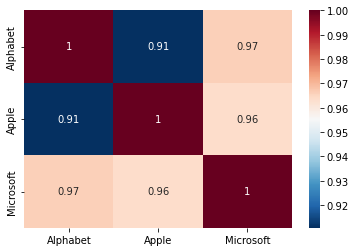

In [ ]:
data = {
    'Alphabet': financial_data_alphabet['close'],
    'Apple': financial_data_apple['close'],
    'Microsoft': financial_data_microsoft['close']
}

newDf = pd.DataFrame(data)

def check_correlation(df, var1, var2, var3):
    # Calculate the correlation matrix
    corr = df[[var1, var2, var3]].corr()
    
    # Print the correlation coefficients
    print('Correlation Matrix:')
    print(corr)
    
    # Plot the correlation heatmap
    sns.heatmap(corr, annot=True, cmap='RdBu_r')

check_correlation(newDf, 'Alphabet', 'Apple', 'Microsoft')

Correlation Matrix:
                 Closing Price  Positive Tweets  Negative Tweets  \
Closing Price         1.000000         0.537275         0.436564   
Positive Tweets       0.537275         1.000000         0.789155   
Negative Tweets       0.436564         0.789155         1.000000   
Neutral Tweets        0.618059         0.897424         0.809852   

                 Neutral Tweets  
Closing Price          0.618059  
Positive Tweets        0.897424  
Negative Tweets        0.809852  
Neutral Tweets         1.000000  


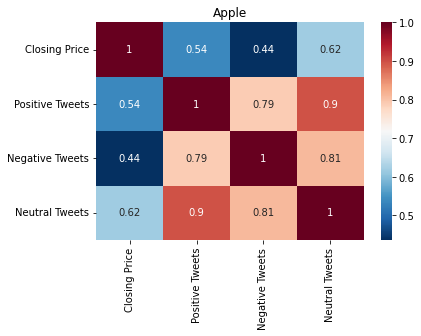

In [ ]:
import pandas as pd
import seaborn as sns


data = {
    'Closing Price': hybrid_data_apple['close'],
    'Positive Tweets': hybrid_data_apple['t_1_positive'].shift(-1),
    'Negative Tweets': hybrid_data_apple['t_1_negative'].shift(-1),
    'Neutral Tweets': hybrid_data_apple['t_1_neutral'].shift(-1)
}

newDf = pd.DataFrame(data)

def check_correlation(df, var1, var2, var3, var4):
    # Calculate the correlation matrix
    corr = df[[var1, var2, var3, var4]].corr()
    
    # Print the correlation coefficients
    print('Correlation Matrix:')
    print(corr)
  
    # Plot the correlation heatmap
    sns.heatmap(corr, annot=True, cmap='RdBu_r').set_title('Apple')

check_correlation(newDf, 'Closing Price', 'Positive Tweets', 'Negative Tweets', 'Neutral Tweets')

Correlation Matrix:
                 Closing Price  Positive Tweets  Negative Tweets  \
Closing Price         1.000000         0.372663         0.316704   
Positive Tweets       0.372663         1.000000         0.737174   
Negative Tweets       0.316704         0.737174         1.000000   
Neutral Tweets        0.478094         0.859327         0.761043   

                 Neutral Tweets  
Closing Price          0.478094  
Positive Tweets        0.859327  
Negative Tweets        0.761043  
Neutral Tweets         1.000000  


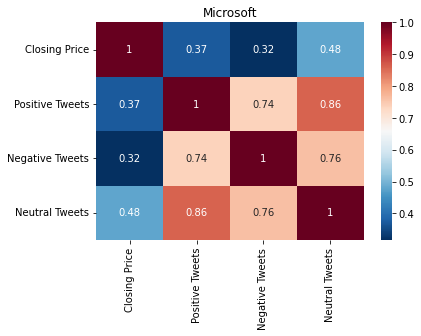

In [ ]:
import pandas as pd
import seaborn as sns


data = {
    'Closing Price': hybrid_data_microsoft['close'],
    'Positive Tweets': hybrid_data_microsoft['t_1_positive'].shift(-1),
    'Negative Tweets': hybrid_data_microsoft['t_1_negative'].shift(-1),
    'Neutral Tweets': hybrid_data_microsoft['t_1_neutral'].shift(-1)
}

newDf = pd.DataFrame(data)

def check_correlation(df, var1, var2, var3, var4):
    # Calculate the correlation matrix
    corr = df[[var1, var2, var3, var4]].corr()
    
    # Print the correlation coefficients
    print('Correlation Matrix:')
    print(corr)
  
    # Plot the correlation heatmap
    sns.heatmap(corr, annot=True, cmap='RdBu_r').set_title('Microsoft')

check_correlation(newDf, 'Closing Price', 'Positive Tweets', 'Negative Tweets', 'Neutral Tweets')

Correlation Matrix:
                 Closing Price  Positive Tweets  Negative Tweets  \
Closing Price         1.000000         0.217688         0.224571   
Positive Tweets       0.217688         1.000000         0.676449   
Negative Tweets       0.224571         0.676449         1.000000   
Neutral Tweets        0.296376         0.728673         0.813500   

                 Neutral Tweets  
Closing Price          0.296376  
Positive Tweets        0.728673  
Negative Tweets        0.813500  
Neutral Tweets         1.000000  


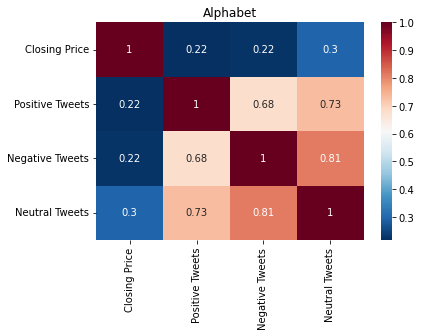

In [ ]:
import pandas as pd
import seaborn as sns


data = {
    'Closing Price': hybrid_data_alphabet['close'],
    'Positive Tweets': hybrid_data_alphabet['t_1_positive'].shift(-1),
    'Negative Tweets': hybrid_data_alphabet['t_1_negative'].shift(-1),
    'Neutral Tweets': hybrid_data_alphabet['t_1_neutral'].shift(-1)
}

newDf = pd.DataFrame(data)

def check_correlation(df, var1, var2, var3, var4):
    # Calculate the correlation matrix
    corr = df[[var1, var2, var3, var4]].corr()
    
    # Print the correlation coefficients
    print('Correlation Matrix:')
    print(corr)

  
    # Plot the correlation heatmap
    sns.heatmap(corr, annot=True, cmap='RdBu_r').set_title('Alphabet')

check_correlation(newDf, 'Closing Price', 'Positive Tweets', 'Negative Tweets', 'Neutral Tweets')

In [ ]:
hybrid_data_alphabet = hybrid_data_alphabet.drop(['close','Unnamed: 0' ], axis=1)
financial_data_alphabet = financial_data_alphabet.drop(['close','Unnamed: 0' ], axis=1)

hybrid_data_apple = hybrid_data_apple.drop(['close','Unnamed: 0'], axis=1)
financial_data_apple = financial_data_apple.drop([ 'close','Unnamed: 0' ], axis=1)

hybrid_data_microsoft = hybrid_data_microsoft.drop(['close','Unnamed: 0'], axis=1)
financial_data_microsoft = financial_data_microsoft.drop([ 'close','Unnamed: 0' ], axis=1)

In [ ]:
financial_data_alphabet_X = financial_data_alphabet_X.fillna(financial_data_alphabet_X.mean())
financial_data_apple_X = financial_data_apple_X.fillna(financial_data_apple_X.mean())
financial_data_microsoft_X = financial_data_microsoft_X.fillna(financial_data_microsoft_X.mean())

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X_hybrid_alphabet = MinMaxScaler()
hybrid_data_alphabet_X = scaler_X_hybrid_alphabet.fit_transform(hybrid_data_alphabet_X)
scaler_X_financial_alphabet = MinMaxScaler()
financial_data_alphabet_X = scaler_X_financial_alphabet.fit_transform(financial_data_alphabet_X)

scaler_X_hybrid_microsoft = MinMaxScaler()
hybrid_data_microsoft_X = scaler_X_hybrid_microsoft.fit_transform(hybrid_data_microsoft_X)
scaler_X_financial_microsoft = MinMaxScaler()
financial_data_microsoft_X = scaler_X_financial_microsoft.fit_transform(financial_data_microsoft_X)

scaler_X_hybrid_apple = MinMaxScaler()
hybrid_data_apple_X = scaler_X_hybrid_apple.fit_transform(hybrid_data_apple_X)
scaler_X_financial_apple = MinMaxScaler()
financial_data_apple_X = scaler_X_financial_apple.fit_transform(financial_data_apple_X)

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X)

financial_cv_apple = tscv.split(financial_data_apple_X)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X)

In [ ]:
apple_financial_reg = LinearRegression()
apple_hybrid_reg = LinearRegression()

microsoft_financial_reg = LinearRegression()
microsoft_hybrid_reg = LinearRegression()

alphabet_financial_reg = LinearRegression()
alphabet_hybrid_reg = LinearRegression()

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X)

financial_cv_apple = tscv.split(financial_data_apple_X)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X, financial_data_microsoft_y)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_alphabet_financial = cross_val_score(alphabet_financial_reg, financial_data_alphabet_X, financial_data_alphabet_y.ravel(), cv=financial_cv_alphabet, scoring='neg_mean_squared_error')
cross_val_alphabet_hybrid = cross_val_score(alphabet_hybrid_reg, hybrid_data_alphabet_X, hybrid_data_alphabet_y.ravel(), cv=hybrid_cv_alphabet, scoring='neg_mean_squared_error')

cross_val_apple_financial = cross_val_score(apple_financial_reg, financial_data_apple_X, financial_data_apple_y.ravel(), cv=financial_cv_apple, scoring='neg_mean_squared_error')
cross_val_apple_hybrid = cross_val_score(apple_hybrid_reg, hybrid_data_apple_X, hybrid_data_apple_y.ravel(), cv=hybrid_cv_apple, scoring='neg_mean_squared_error')

cross_val_microsoft_financial = cross_val_score(microsoft_financial_reg, financial_data_microsoft_X, financial_data_microsoft_y.ravel(), cv=financial_cv_microsoft, scoring='neg_mean_squared_error')
cross_val_microsoft_hybrid = cross_val_score(microsoft_hybrid_reg, hybrid_data_microsoft_X, hybrid_data_microsoft_y.ravel(), cv=hybrid_cv_microsoft, scoring='neg_mean_squared_error')

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

financial_cv_alphabet = tscv.split(financial_data_alphabet_X)
hybrid_cv_alphabet = tscv.split(hybrid_data_alphabet_X)

financial_cv_apple = tscv.split(financial_data_apple_X)
hybrid_cv_apple = tscv.split(hybrid_data_apple_X)

financial_cv_microsoft = tscv.split(financial_data_microsoft_X, financial_data_microsoft_y)
hybrid_cv_microsoft = tscv.split(hybrid_data_microsoft_X)

In [ ]:
cross_val_alphabet_financial_mape = cross_val_score(alphabet_financial_reg, financial_data_alphabet_X, financial_data_alphabet_y.ravel(), cv=financial_cv_alphabet, scoring='neg_mean_absolute_percentage_error')
cross_val_alphabet_hybrid_mape = cross_val_score(alphabet_hybrid_reg, hybrid_data_alphabet_X, hybrid_data_alphabet_y.ravel(), cv=hybrid_cv_alphabet, scoring='neg_mean_absolute_percentage_error')

cross_val_apple_financial_mape = cross_val_score(apple_financial_reg, financial_data_apple_X, financial_data_apple_y.ravel(), cv=financial_cv_apple, scoring='neg_mean_absolute_percentage_error')
cross_val_apple_hybrid_mape = cross_val_score(apple_hybrid_reg, hybrid_data_apple_X, hybrid_data_apple_y.ravel(), cv=hybrid_cv_apple, scoring='neg_mean_absolute_percentage_error')

cross_val_microsoft_financial_mape = cross_val_score(microsoft_financial_reg, financial_data_microsoft_X, financial_data_microsoft_y.ravel(), cv=financial_cv_microsoft, scoring='neg_mean_absolute_percentage_error')
cross_val_microsoft_hybrid_mape = cross_val_score(microsoft_hybrid_reg, hybrid_data_microsoft_X, hybrid_data_microsoft_y.ravel(), cv=hybrid_cv_microsoft, scoring='neg_mean_absolute_percentage_error')

In [ ]:
cross_val_alphabet_financial = cross_val_alphabet_financial.mean() * -1
cross_val_alphabet_hybrid = cross_val_alphabet_hybrid.mean() * -1
cross_val_apple_financial = cross_val_apple_financial.mean() * -1
cross_val_apple_hybrid = cross_val_apple_hybrid.mean() * -1
cross_val_microsoft_financial = cross_val_microsoft_financial.mean() * -1
cross_val_microsoft_hybrid = cross_val_microsoft_hybrid.mean() * -1

In [ ]:
cross_val_alphabet_financial_mape = cross_val_alphabet_financial_mape.mean() * -1
cross_val_alphabet_hybrid_mape = cross_val_alphabet_hybrid_mape.mean() * -1
cross_val_apple_financial_mape = cross_val_apple_financial_mape.mean() * -1
cross_val_apple_hybrid_mape = cross_val_apple_hybrid_mape.mean() * -1
cross_val_microsoft_financial_mape = cross_val_microsoft_financial_mape.mean() * -1
cross_val_microsoft_hybrid_mape = cross_val_microsoft_hybrid_mape.mean() * -1

In [ ]:
def assign_direction_prediction(val):
  open = val['open']
  close = val['prediction']
  if (open < close):
    val['direction_prediction'] = 1
  if (close == open):
    val['direction_prediction'] = 0
  if (open > close):
    val['direction_prediction'] = 2
  return val

def assign_actual_direction(val):
  open = val['open']
  close = val['actual']
  if (open < close):
    val['direction_actual'] = 1
  if (close == open):
    val['direction_actual'] = 0
  if (open > close):
    val['direction_actual'] = 2
  return val



def plot_price_prediction(x, y, model, title, ax, scaler, open_column):
    train_X_1 = x[0:200]
    train_X_2 = x[0:400]
    train_X_3 = x[0:600]
    train_X_4 = x[0:800]
    test_X_1 = x[200:400]
    test_X_2 = x[400:600]
    test_X_3 = x[600:800]
    test_X_4 = x[800:]

    train_y_1 = y[0:200]
    train_y_2 = y[0:400]
    train_y_3 = y[0:600]
    train_y_4 = y[0:800]
    test_y_1 = y[200:400]
    test_y_2 = y[400:600]
    test_y_3 = y[600:800]
    test_y_4 = y[800:]

    data_to_be_rescaled = x[200:]

    model.fit(train_X_1, train_y_1)
    predict_1 = model.predict(test_X_1)
    model.fit(train_X_2, train_y_2)
    predict_2 = model.predict(test_X_2)
    model.fit(train_X_3, train_y_3)
    predict_3 = model.predict(test_X_3)
    model.fit(train_X_4, train_y_4)
    predict_4 = model.predict(test_X_4)

    final_predictions = [predict_1, predict_2, predict_3, predict_4]
    final_actuals = [test_y_1, test_y_2, test_y_3, test_y_4]

    predictions = np.concatenate(final_predictions).ravel()
    true = np.concatenate(final_actuals).ravel()

    date = pd.DataFrame(hybrid_data_microsoft['date'][200:]).reset_index(drop=True)
    
    de_scaled_data = pd.DataFrame(scaler.inverse_transform(data_to_be_rescaled))
    dataFrame = {'actual': true,
            'prediction': predictions,
            'open': de_scaled_data[open_column].shift(-1)}
    dataFrame = pd.DataFrame(dataFrame)
    dataFrame = pd.concat([dataFrame, date], axis=1)
    dataFrame = dataFrame.dropna()
    dataFrame = dataFrame.set_index('date')

    
    dataFrame.plot(xlabel="Date", ylabel="Price", title=title, ax=ax)
    
    dataFrame = dataFrame.apply(assign_direction_prediction, axis=1)
    dataFrame = dataFrame.apply(assign_actual_direction, axis=1)
    accuracy = accuracy_score(dataFrame['direction_actual'], dataFrame['direction_prediction'])
    return accuracy


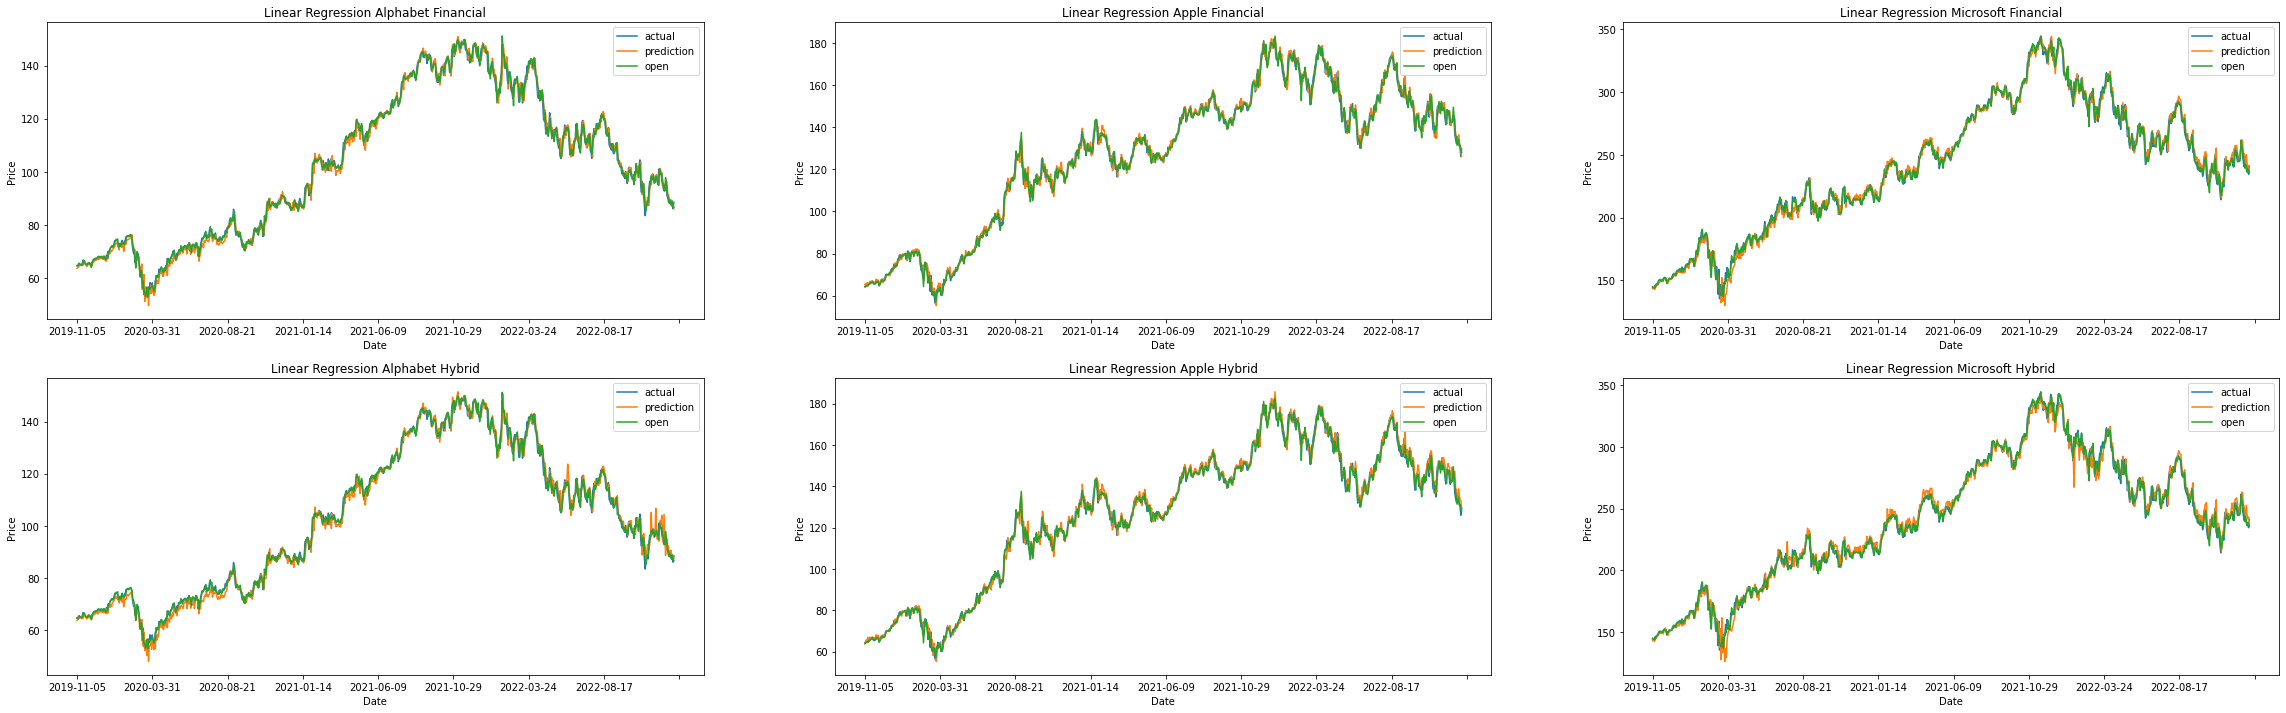

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(40, 12))
microsoft_financial_reg = LinearRegression()
accuracy_microsoft_financial = plot_price_prediction(financial_data_microsoft_X, financial_data_microsoft_y, microsoft_financial_reg, "Linear Regression Microsoft Financial", axs[0, 2],scaler_X_financial_microsoft, 4)
microsoft_hybrid_reg = LinearRegression()
accuracy_microsoft_hybrid = plot_price_prediction(hybrid_data_microsoft_X, hybrid_data_microsoft_y, microsoft_hybrid_reg, "Linear Regression Microsoft Hybrid", axs[1, 2],scaler_X_hybrid_microsoft, 19)

apple_financial_reg = LinearRegression()
accuracy_apple_financial = plot_price_prediction(financial_data_apple_X, financial_data_apple_y, apple_financial_reg, "Linear Regression Apple Financial", axs[0, 1],scaler_X_financial_apple, 4)
apple_hybrid_reg = LinearRegression()
accuracy_apple_hybrid = plot_price_prediction(hybrid_data_apple_X, hybrid_data_apple_y, apple_hybrid_reg, "Linear Regression Apple Hybrid", axs[1, 1],scaler_X_hybrid_apple, 19)

alphabet_financial_reg = LinearRegression()
accuracy_alphabet_financial = plot_price_prediction(financial_data_alphabet_X, financial_data_alphabet_y, alphabet_financial_reg, "Linear Regression Alphabet Financial", axs[0, 0], scaler_X_financial_alphabet, 4)
alphabet_hybrid_reg = LinearRegression()
accuracy_alphabet_hybrid = plot_price_prediction(hybrid_data_alphabet_X, hybrid_data_alphabet_y, alphabet_hybrid_reg, "Linear Regression Alphabet Hybrid", axs[1, 0],scaler_X_hybrid_alphabet, 19)

In [ ]:
results = pd.DataFrame(columns=['data','MSE','RMSE', "Direction Accuracy"])

results = results.append({'data':'Alphabet Financial',
                              'MSE':cross_val_alphabet_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_alphabet_financial),
                              'MAPE':cross_val_alphabet_financial_mape,
                              "Direction Accuracy": accuracy_alphabet_financial},ignore_index=True)
results = results.append({'data':'Alphabet Hybrid',
                              'MSE':cross_val_alphabet_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_alphabet_hybrid),
                              'MAPE': cross_val_alphabet_hybrid_mape,
                              "Direction Accuracy": accuracy_alphabet_hybrid},ignore_index=True)
results = results.append({'data':'Apple Financial',
                              'MSE':cross_val_apple_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_apple_financial),
                              'MAPE':cross_val_apple_financial_mape,
                          "Direction Accuracy": accuracy_apple_financial},ignore_index=True)
results = results.append({'data':'Apple Hybrid',
                              'MSE':cross_val_apple_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_apple_hybrid),
                              'MAPE': cross_val_apple_hybrid_mape,
                              "Direction Accuracy": accuracy_apple_hybrid},ignore_index=True)
results = results.append({'data':'Microsoft Financial',
                              'MSE':cross_val_microsoft_financial.ravel()[0],
                              'RMSE':math.sqrt(cross_val_microsoft_financial),
                              'MAPE':cross_val_microsoft_financial_mape,
                          "Direction Accuracy": accuracy_microsoft_financial},ignore_index=True)
results = results.append({'data':'Microsoft Hybrid',
                              'MSE':cross_val_microsoft_hybrid.ravel()[0],
                              'RMSE':math.sqrt(cross_val_microsoft_hybrid),
                              'MAPE':cross_val_microsoft_hybrid_mape,
                          "Direction Accuracy": accuracy_microsoft_hybrid},ignore_index=True)


<ipython-input-80-925eeba22264>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Alphabet Financial',
<ipython-input-80-925eeba22264>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Alphabet Hybrid',
<ipython-input-80-925eeba22264>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Apple Financial',
<ipython-input-80-925eeba22264>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'data':'Apple Hybrid',
<ipython-input-80-925eeba22264>:23: FutureWarning: The frame.append method is deprecated and will be removed f

In [ ]:
display(results)

,data,MSE,RMSE,Direction Accuracy,MAPE
0,Alphabet Financial,5.106743,2.259810,0.486146,0.017410
1,Alphabet Hybrid,6.247442,2.499488,0.489924,0.019233
2,Apple Financial,9.063674,3.010594,0.483627,0.019725
3,Apple Hybrid,10.395062,3.224137,0.481108,0.020928
4,Microsoft Financial,28.074048,5.298495,0.491184,0.017424
5,Microsoft Hybrid,32.861333,5.732481,0.506297,0.018428
